# Comparison of NBA Attendance vs Teams with High Paid Players
* Attendance is difficult to normalize because statudim sizes may differ significantly. In light of that, the average attendance over the 41 regular season games was used. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [53]:
#Importing files
star_attendance = pd.read_csv("Cleaned_Data/star_team_attendance.csv")
no_star_attendance = pd.read_csv("Cleaned_Data/no_star_team_attendance.csv")

,Team,Home AVG,Road AVG,Year
0,Atlanta Hawks,17412,17582,2015
1,Boston Celtics,17594,17742,2015
2,Charlotte Hornets,17192,17654,2015
3,Chicago Bulls,21866,18405,2015
4,Dallas Mavericks,20188,17653,2015
...,...,...,...,...
78,Brooklyn Nets,14941,18086,2019
79,New York Knicks,19002,17566,2019
80,Philadelphia 76ers,20453,17895,2019
81,Portland Trail Blazers,19496,17951,2019


In [47]:
#Grouping the team attendance by year
stars_by_year = star_attendance.groupby("Year").mean()
no_stars_by_year = no_star_attendance.groupby("Year").mean()

In [48]:
comparing_attendance = pd.merge(stars_by_year, no_stars_by_year, on = "Year", suffixes= (" Stars", " No Stars"))
comparing_attendance = comparing_attendance.reset_index()

## Home vs Road Game Attendance Comparison

In [5]:
#Creating lists for bar chart plots
years = [year for year in comparing_attendance["Year"]]
home_stars = [atten for atten in comparing_attendance["Home AVG Stars"]]
home_no_stars = [atten for atten in comparing_attendance["Home AVG No Stars"]]
road_stars = [atten for atten in comparing_attendance["Road AVG Stars"]]
road_no_stars = [atten for atten in comparing_attendance["Road AVG No Stars"]]
bar_sets = 5

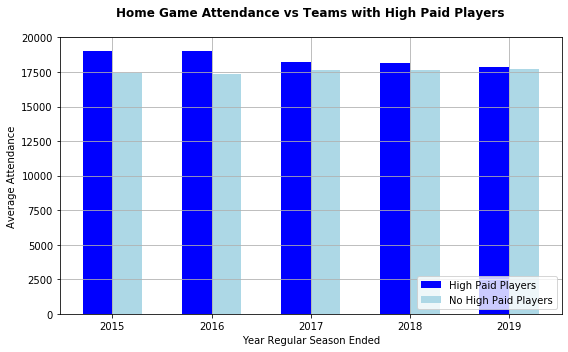

In [6]:
#Setting the plots
fig, axes = plt.subplots(figsize=(8,5))

year = np.arange(bar_sets)    # the x locations for the groups
width = 0.30         # the width of the bars
p1 = axes.bar(year, home_stars, width, bottom=0, color='blue')
p2 = axes.bar(year + width, home_no_stars, width, bottom=0, color='lightblue')

#Adding lables for Home Games plot
axes.set_title('Home Game Attendance vs Teams with High Paid Players\n', fontweight="black")
axes.set_xticks(year + width / 2)
axes.set_xticklabels(years)
axes.set_xlabel("Year Regular Season Ended")
axes.set_ylabel("Average Attendance")
#Make the legend and place it in the lower right
axes.legend((p1[0], p2[0]), ('High Paid Players', 'No High Paid Players'), loc=4)

#Plotting the data
axes.autoscale_view()
plt.grid()
plt.tight_layout() 
plt.show()

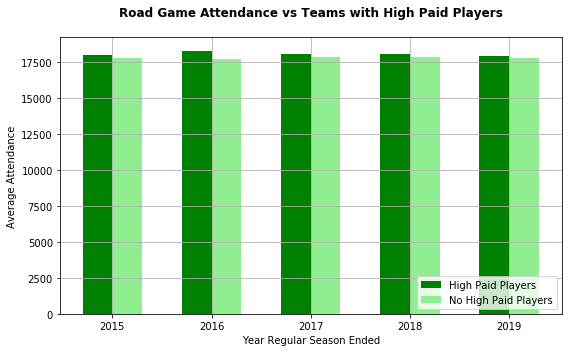

In [7]:
#Setting the plots
fig, axes = plt.subplots(figsize=(8,5))

year = np.arange(bar_sets)    # the x locations for the groups
width = 0.30         # the width of the bars
p1 = axes.bar(year, road_stars, width, bottom=0, color="green" )
p2 = axes.bar(year + width, road_no_stars, width, bottom=0, color="lightgreen")

#Adding lables for Home Games plot
axes.set_title('Road Game Attendance vs Teams with High Paid Players\n', fontweight="black")
axes.set_xticks(year + width / 2)
axes.set_xticklabels(years)
axes.set_xlabel("Year Regular Season Ended")
axes.set_ylabel("Average Attendance")
#Make the legend and place it in the lower right
axes.legend((p1[0], p2[0]), ('High Paid Players', 'No High Paid Players'), loc=4)

#Plotting the data
axes.autoscale_view()
plt.grid()
plt.tight_layout() 
plt.show()

## Number of Teams with High Paid Players Comparison

In [34]:
#Getting the graph data
x_axis = years
hpp_teams = star_attendance.groupby("Year").count().reset_index()
no_hpp_teams = no_star_attendance.groupby("Year").count().reset_index()
y_hpp = [item for item in hpp_teams["Team"]]
y_no_hpp = [item for item in no_hpp_teams["Team"]]

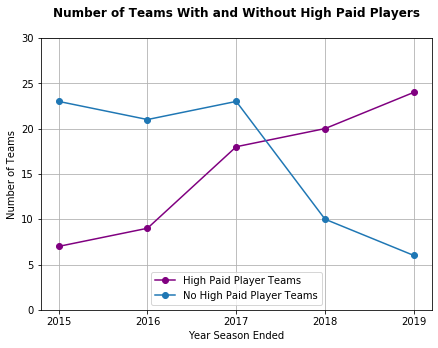

In [52]:
plt.figure(figsize=(7,5))

plt.plot(x_axis, y_hpp, marker = "o", label = "High Paid Player Teams", color="purple")
plt.plot(x_axis, y_no_hpp, marker = "o", label = "No High Paid Player Teams")

#Adding Plot Labels
plt.title("Number of Teams With and Without High Paid Players\n", fontweight="black")
plt.xlabel("Year Season Ended")
plt.ylabel("Number of Teams")
plt.xticks(years)
plt.ylim(0,30)

plt.grid()
#Positon legend at the bottom in the center
plt.legend(loc=8)
plt.show()

## Home vs Road Attendance Quartile Analysis

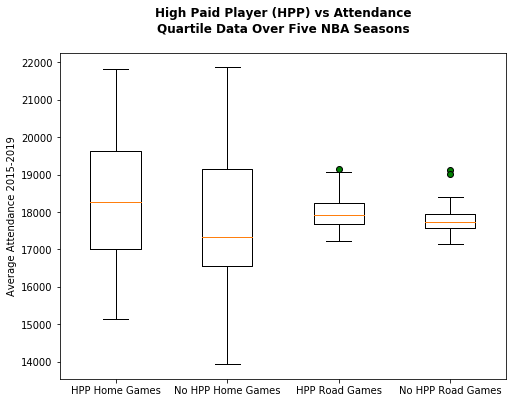

In [74]:
#Getting home and road average attendance data for box plot
sa_home_avg = star_attendance["Home AVG"]
sa_home_box = [avg for avg in sa_home_avg]
sa_road_avg = star_attendance["Road AVG"]
sa_road_box = [avg for avg in sa_road_avg]

nsa_home_avg = no_star_attendance["Home AVG"]
nsa_home_box = [avg for avg in nsa_home_avg]
nsa_road_avg = no_star_attendance["Road AVG"]
nsa_road_box = [avg for avg in nsa_road_avg]

avg_att = [sa_home_box, nsa_home_box, sa_road_box, nsa_road_box]

#Creating labels for box plots
attendance = ["HPP Home Games", "No HPP Home Games", "HPP Road Games", "No HPP Road Games"]

#Create a figure instance
fig = plt.figure(1, figsize= (8, 6))

# Create an axes instance
axes = fig.add_subplot(111)

# Create the boxplots and style the outliers
#flierprops argument uses a dictionary with a pair of attributes for styling the outlier markers
axes.boxplot(avg_att, flierprops=dict(markerfacecolor='green', marker='o'))

#Add boxplot title
axes.set_title("High Paid Player (HPP) vs Attendance\nQuartile Data Over Five NBA Seasons\n", fontweight="black")

#Add the axes labels
axes.set_xticklabels(attendance)
axes.set_ylabel("Average Attendance 2015-2019")
    
plt.show()